<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.shape

(10000, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [36]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [38]:
y_train.shape

(8000,)

In [39]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim=11))

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(X_train_trf,y_train,validation_data=(X_test_trf,y_test),epochs=20,batch_size=32)

Epoch 1/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4958 - accuracy: 0.7854 - val_loss: 0.4294 - val_accuracy: 0.8130
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8186 - val_loss: 0.3994 - val_accuracy: 0.8340
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8360 - val_loss: 0.3737 - val_accuracy: 0.8570
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8496 - val_loss: 0.3554 - val_accuracy: 0.8585
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8566 - val_loss: 0.3505 - val_accuracy: 0.8605
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.8583 - val_loss: 0.3427 - val_accuracy: 0.8615
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8604 - val_loss: 0.3408 - val_accuracy: 0.8580
Epoch 

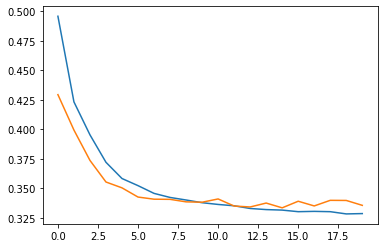

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

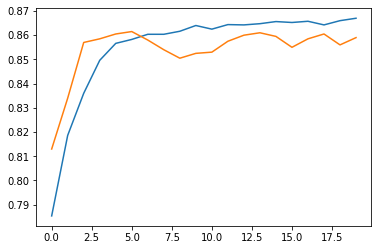

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [44]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [48]:
y_pred=y_pred.argmax(axis=1)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975